# MUR Dataset Exploration with xarray

This notebook is for exploring the functions of Xarray and developing a deep understanding of the variables within the MUR 1-km dataset

## Import data

In [1]:
import netCDF4
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import timeit

In [2]:
mur = xr.open_dataset('../data/20160101090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc')

In [3]:
mur

<xarray.Dataset>
Dimensions:           (lat: 17999, lon: 36000, time: 1)
Coordinates:
  * time              (time) datetime64[ns] 2016-01-01T09:00:00
  * lat               (lat) float32 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon               (lon) float32 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    dt_1km_data       (time, lat, lon) timedelta64[ns] ...
Attributes: (12/47)
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

## SST

In [4]:
sst = mur["analysed_sst"]
sst

<xarray.DataArray 'analysed_sst' (time: 1, lat: 17999, lon: 36000)>
[647964000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01T09:00:00
  * lat      (lat) float32 -89.99 -89.98 -89.97 -89.96 ... 89.97 89.98 89.99
  * lon      (lon) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -32767
    valid_max:      32767
    comment:        "Final" version using Multi-Resolution Variational Analys...
    source:         MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRR19_G-NAVO, AV...

/Users/matthewthompson/opt/anaconda3/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


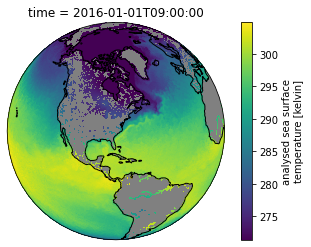

In [8]:
p = sst.isel(time=0).plot(
        subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
        transform=ccrs.PlateCarree()
)
p.axes.set_global()
p.axes.coastlines()

## Analysis error

In [40]:
error = mur["analysis_error"]
error

<xarray.DataArray 'analysis_error' (time: 1, lat: 17999, lon: 36000)>
array([[[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ...,
        [0.34, 0.34, ..., 0.34, 0.34],
        [0.34, 0.34, ..., 0.34, 0.34]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01T09:00:00
  * lat      (lat) float32 -89.99 -89.98 -89.97 -89.96 ... 89.97 89.98 89.99
  * lon      (lon) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes:
    long_name:  estimated error standard deviation of analysed_sst
    units:      kelvin
    valid_min:  0
    valid_max:  32767
    comment:    none

In [31]:
errorMean = error.mean()
print(errorMean)

<xarray.DataArray 'analysis_error' ()>
array(0.37430874, dtype=float32)


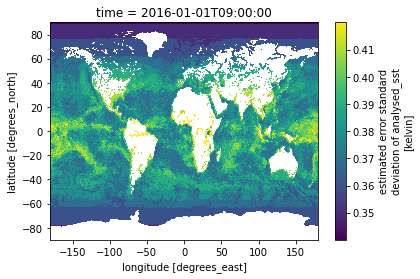

In [33]:
error.plot()

## Mask

In [61]:
mask = mur["mask"]
mask

<xarray.DataArray 'mask' (time: 1, lat: 17999, lon: 36000)>
array([[[2., 2., ..., 2., 2.],
        [2., 2., ..., 2., 2.],
        ...,
        [9., 9., ..., 9., 9.],
        [9., 9., ..., 9., 9.]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01T09:00:00
  * lat      (lat) float32 -89.99 -89.98 -89.97 -89.96 ... 89.97 89.98 89.99
  * lon      (lon) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes:
    long_name:      sea/land field composite mask
    valid_min:      1
    valid_max:      31
    flag_masks:     [ 1  2  4  8 16]
    flag_values:    [ 1  2  5  9 13]
    flag_meanings:  1=open-sea, 2=land, 5=open-lake, 9=open-sea with ice in t...
    comment:        mask can be used to further filter the data.
    source:         GMT "grdlandmask", ice flag from sea_ice_fraction data

### Filtering dataset based on mask value

In [70]:
print(mask.count())
print(mask.size)

<xarray.DataArray 'mask' ()>
array(647964000)
647964000


In [63]:
onlyWater = mask.where(mask == 1)

In [64]:
print(onlyWater.max())

<xarray.DataArray 'mask' ()>
array(1.)


In [66]:
onlyWater

<xarray.DataArray 'mask' (time: 1, lat: 17999, lon: 36000)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01T09:00:00
  * lat      (lat) float32 -89.99 -89.98 -89.97 -89.96 ... 89.97 89.98 89.99
  * lon      (lon) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes:
    long_name:      sea/land field composite mask
    valid_min:      1
    valid_max:      31
    flag_masks:     [ 1  2  4  8 16]
    flag_values:    [ 1  2  5  9 13]
    flag_meanings:  1=open-sea, 2=land, 5=open-lake, 9=open-sea with ice in t...
    comment:        mask can be used to further filter the data.
    source:         GMT "grdlandmask", ice flag from sea_ice_fraction data

In [73]:
print(onlyWater.count())
print(onlyWater.size)

<xarray.DataArray 'mask' ()>
array(355615568)
647964000


### Dataset "filtered", however filled with NA's where condition == False

In [83]:
onlyWaterReduced = onlyWaterReduced.dropna("lat")
onlyWaterReduced = onlyWaterReduced.dropna("lon")
onlyWaterReduced = onlyWaterReduced.dropna("time")

In [99]:
onlyWaterReduced.size

5544000

### Now dataset properly filtered, must drop NA's one dimension at a time

### Now let's try filtering SST's using mask data

In [86]:
sstTest = mur["analysed_sst"]
sstTest.size

647964000

In [88]:
sstTest = sstTest.dropna("lat")
sstTest = sstTest.dropna("lon")
sstTest = sstTest.dropna("time")

In [89]:
sstTest.size   # Different size dataset than the mask == open-sea data

52308000

In [95]:
sstTest2 = mur["analysed_sst"]
mask2 = mur["mask"]

In [96]:
sstTest2 = sstTest2.where(mask2 == 1)

In [97]:
sstTest2.size

647964000

In [98]:
sstTest2 = sstTest2.dropna("lat")
sstTest2 = sstTest2.dropna("lon")
sstTest2 = sstTest2.dropna("time")
sstTest2.size   # Equivalent to mask == open-sea dataset size

5544000

## Sea Ice Fraction

In [37]:
sif = mur["sea_ice_fraction"]
sif

<xarray.DataArray 'sea_ice_fraction' (time: 1, lat: 17999, lon: 36000)>
[647964000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01T09:00:00
  * lat      (lat) float32 -89.99 -89.98 -89.97 -89.96 ... 89.97 89.98 89.99
  * lon      (lon) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes:
    long_name:      sea ice area fraction
    standard_name:  sea ice area fraction
    units:          fraction (between 0 and 1)
    valid_min:      0
    valid_max:      100
    source:         EUMETSAT OSI-SAF, copyright EUMETSAT
    comment:        ice data interpolated by a nearest neighbor approach.

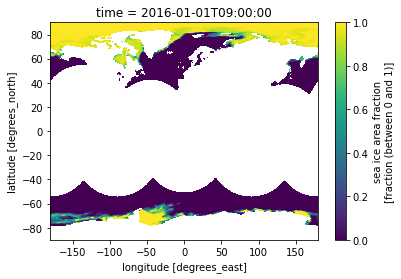

In [100]:
sif.plot()

## Time to last observation

In [112]:
dt = mur["dt_1km_data"]
dt

<xarray.DataArray 'dt_1km_data' (time: 1, lat: 17999, lon: 36000)>
array([[['NaT', 'NaT', ..., 'NaT', 'NaT'],
        ['NaT', 'NaT', ..., 'NaT', 'NaT'],
        ...,
        ['NaT', 'NaT', ..., 'NaT', 'NaT'],
        ['NaT', 'NaT', ..., 'NaT', 'NaT']]], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01T09:00:00
  * lat      (lat) float32 -89.99 -89.98 -89.97 -89.96 ... 89.97 89.98 89.99
  * lon      (lon) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes:
    long_name:      time to most recent 1km data
    standard_name:  time to most recent 1km data
    valid_min:      -127
    valid_max:      127
    source:         MODIS and VIIRS pixels ingested by MUR
    comment:        The grid value is hours between the analysis time and the...

In [103]:
dtMean = dt.mean()
print(dtMean)

<xarray.DataArray 'dt_1km_data' ()>
array(7145516011317, dtype='timedelta64[ns]')


In [109]:
hours = dtMean.astype('timedelta64[h]')
hours / np.timedelta64(1, 'h')
print(hours)

<xarray.DataArray 'dt_1km_data' ()>
array(3600000000000, dtype='timedelta64[ns]')


In [113]:
dt.max()

<xarray.DataArray 'dt_1km_data' ()>
array('NaT', dtype='timedelta64[ns]')

In [114]:
dt.min()

<xarray.DataArray 'dt_1km_data' ()>
array('NaT', dtype='timedelta64[ns]')

### Really not sure what is going on here, it looks like every value in dt_1km_data is "NaT"

## Testing timer function

In [26]:
start_time = timeit.default_timer()
sstMean = sst.mean()
elapsed = timeit.default_timer() - start_time
print(elapsed)

3.5625915110003916


In [29]:
NUMBER = 10
TESTCODE = '''
sstMean1 = sst.mean()
'''
timeit.timeit(stmt=TESTCODE,  
              number=NUMBER, 
              globals=globals()   # Allows timeit call to see global imports and variables
) / NUMBER   # Finds average execution time over all runs

4.2229447640000215

In [32]:
print(sstMean)

<xarray.DataArray 'analysed_sst' ()>
array(286.98077, dtype=float32)
